In [ ]:
import numpy as np

1. Operations with matrices


In [ ]:
#1a
a = np.array([[1, 2, 4], [7, 5, -2], [-2, 1, 3]])
b = np.array([[-1, 0, 3], [2, -6, 1], [-7, 1, 5]])
c = np.array([[-2, 3], [4, 0], [7, 0]])
a_c = np.matmul(a, c)
print(f'A + B: {a + b}')
print(f'B - A: {b - a}')
print(f'A * C: {a_c}')
print(f'A * C * B: {np.matmul(b, a_c)}')

A + B: [[ 0  2  7]
 [ 9 -1 -1]
 [-9  2  8]]
B - A: [[ -2  -2  -1]
 [ -5 -11   3]
 [ -5   0   2]]
A * C: [[34  3]
 [-8 21]
 [29 -6]]
A * C * B: [[  53  -21]
 [ 145 -126]
 [-101  -30]]


In [ ]:
#1b
a = np.array([[0, 3, 4], [-7, 1, -2], [2, -1, 3]])
b = np.array([[1, 2, 4], [7, 0, -2], [-3, -2, 5]])
c = np.array([[-3, 2], [0, 4], [-1, 7]])
a_c = np.matmul(a, c)
print(f'A + B: {a + b}')
print(f'B - A: {b - a}')
print(f'A * C: {a_c}')
print(f'A * C * B: {np.matmul(b, a_c)}')

A + B: [[ 1  5  8]
 [ 0  1 -4]
 [-1 -3  8]]
B - A: [[ 1 -1  0]
 [14 -1  0]
 [-5 -1  2]]
A * C: [[ -4  40]
 [ 23 -24]
 [ -9  21]]
A * C * B: [[  6  76]
 [-10 238]
 [-79  33]]


In [ ]:
#1c
a = np.array([[5, 2, 9], [7, 0, -2], [-2, 3, 0]])
b = np.array([[1, -2, 1], [1, -3, -2], [-2, 1, 3]])
c = np.array([[-2, 3], [4, 5], [0, -1]])
a_c = np.matmul(a, c)
print(f'A + B: {a + b}')
print(f'B - A: {b - a}')
print(f'A * C: {a_c}')
print(f'A * C * B: {np.matmul(b, a_c)}')

A + B: [[ 6  0 10]
 [ 8 -3 -4]
 [-4  4  3]]
B - A: [[-4 -4 -8]
 [-6 -3  0]
 [ 0 -2  3]]
A * C: [[ -2  16]
 [-14  23]
 [ 16   9]]
A * C * B: [[ 42 -21]
 [  8 -71]
 [ 38  18]]


In [ ]:
#1d
a = np.array([[1, -2, 8], [7, 5, -2], [-2, 3, 0]])
b = np.array([[0, 2, 4], [1, -3, -2], [-2, 1, 3]])
c = np.array([[0, 3], [5, -4], [7, -1]])
a_c = np.matmul(a, c)
print(f'A + B: {a + b}')
print(f'B - A: {b - a}')
print(f'A * C: {a_c}')
print(f'A * C * B: {np.matmul(b, a_c)}')

A + B: [[ 1  0 12]
 [ 8  2 -4]
 [-4  4  3]]
B - A: [[-1  4 -4]
 [-6 -8  0]
 [ 0 -2  3]]
A * C: [[ 46   3]
 [ 11   3]
 [ 15 -18]]
A * C * B: [[ 82 -66]
 [-17  30]
 [-36 -57]]


In [ ]:
#1e
a = np.array([[9, 2, 4], [7, 5, -5], [6, -2, 3]])
b = np.array([[8, 2, 4], [0, 1, -3], [-2, 1, 6]])
c = np.array([[-2, 0], [4, 8], [1, -1]])
a_c = np.matmul(a, c)
print(f'A + B: {a + b}')
print(f'B - A: {b - a}')
print(f'A * C: {a_c}')
print(f'A * C * B: {np.matmul(b, a_c)}')

A + B: [[17  4  8]
 [ 7  6 -8]
 [ 4 -1  9]]
B - A: [[-1  0  0]
 [-7 -4  2]
 [-8  3  3]]
A * C: [[ -6  12]
 [  1  45]
 [-17 -19]]
A * C * B: [[-114  110]
 [  52  102]
 [ -89  -93]]


### 2. Image Convolution



In [100]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


img = Image.open('baby_animal.jpg')
img.load()
df = np.asarray(img)
print(df.shape)

sharpe_fltr = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
laplacian_fltr = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
edge_fltr = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])


(639, 640, 3)


In [98]:
def convolution2D(x: np.array, y: np.array) -> np.array:

    '''
    A function that applies a convolution to an image together with padding

    :x np.array: an image to be filtered in array format
    :y np.array: a kernel, square matrix with odd number of rows and columns
    :result np.array: a filtered image with the same dimension as the x
    '''

    if len(y) % 2 == 0 or y.shape[0] != y.shape[1]:
        raise TypeError('Only square matricies with odd dimensions are allowed')
    else:
        # Padding process
        df = x
        incr = int((len(y) - 1) / 2)
        null_array_v = np.zeros((incr, x.shape[1], x.shape[2]), dtype = int)

        df = np.vstack((null_array_v, df))
        df = np.vstack((df, null_array_v))

        null_array_h = np.zeros((df.shape[0], incr, x.shape[2]), dtype = int)

        df = np.hstack((null_array_h, df))
        df = np.hstack((df, null_array_h))

        # A new zero array to be filled with filtered values
        empty_array = np.zeros_like(df)

        # Convolution
    for layer in range(df.shape[2]):
        for column in range(incr, df.shape[1] - incr):
            for row in range(incr, df.shape[0] - incr):
                temp_array = df[row - incr: row + incr + 1, column - incr : column + incr + 1, layer].copy()

                for i in range(temp_array.shape[0]):
                    for j in range(temp_array.shape[1]):
                        temp_array[i, j] *= y[i, j]

                if np.sum(temp_array) < 0:
                      empty_array[row, column, layer] = 0
                elif np.sum(temp_array) > 255:
                      empty_array[row, column, layer] = 255
                else:
                      empty_array[row, column, layer] = int(np.sum(temp_array))

    # Cutting
    row_cut = empty_array.shape[0] - incr
    column_cut = empty_array.shape[1] - incr
    empty_array = empty_array[incr: row_cut, incr: column_cut ]
    img = plt.imshow(empty_array)
    print(empty_array.shape)

    return plt.show


(639, 640, 3)
<function show at 0x7ee19e13d3f0>


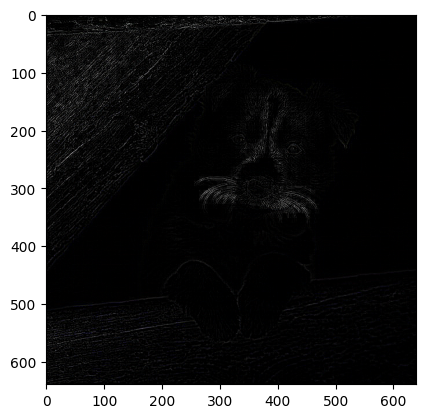

In [99]:
print(convolution2D(df, laplacian_fltr))

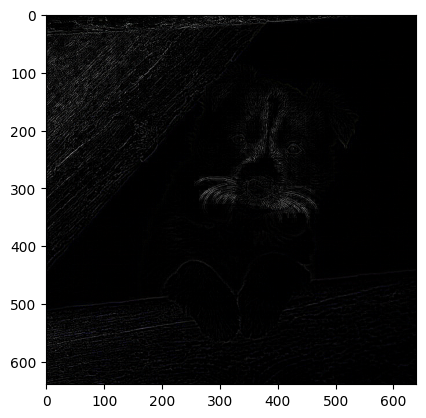

In [101]:
import cv2

img2 = cv2.filter2D(df, -1, laplacian_fltr)
plt.imshow(img2)
plt.show()